# 9 Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

In [60]:
import pandas as pd
# allow plots to appear in the notebook
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10.0, 5.0)


X = pd.read_csv('../data/3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon'])
X = X.drop(['osm'], axis=1).sample(10000)
X.head()

,lat,lon
108514324,57.116136,7.935940
145155209,57.323512,28.719403
139894123,57.491219,42.535347
80477583,57.418888,19.245527
103953351,56.871157,20.010514


In [61]:
# K-means with N clusters
N = 7
from sklearn.cluster import KMeans
km = KMeans(n_clusters=N, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [62]:
# review the cluster labels
set(km.labels_)

{0, 1, 2, 3, 4, 5, 6}

In [63]:
X['cluster'] = km.predict(X)

In [64]:
XX = X.copy()
XX['lat'] = (X.lat - X.lat.mean())/X.lat.std()
XX['lon'] = (X.lon - X.lon.mean())/X.lon.std()

In [65]:
# calculate SC for K=7
from sklearn import metrics
metrics.silhouette_score(XX[['lon', 'lat']], XX.cluster)

0.10349585363140311

In [107]:
from sklearn.cluster import DBSCAN
from tqdm import tqdm
import numpy as np

start   = 0.0
stop    = 0.45
step    = 0.01
my_list = np.arange(start, stop+step, step)

startb   = 1
stopb    = 10
stepb    = .2 # To scale proportionately with epsilon increments
my_listb = np.arange(startb, stopb+stepb, stepb)


my_range = range(45)

one = []
for i in tqdm(my_range):
    dbscan = DBSCAN(eps = .05 + my_list[i] , min_samples = 1 + my_listb[i])
    XX.cluster = dbscan.fit_predict(XX[['lat','lon']])
    one.append(metrics.silhouette_score(XX[['lat', 'lon']], XX.cluster))
    
two = []
for i in tqdm(my_range):
    dbscan = DBSCAN(eps = .05 + my_list[i] , min_samples = 2 + my_listb[i])
    XX.cluster = dbscan.fit_predict(XX[['lat','lon']])
    two.append(metrics.silhouette_score(XX[['lat', 'lon']], XX.cluster))
    
three = []
for i in tqdm(my_range):
    dbscan = DBSCAN(eps = .05 + my_list[i] , min_samples = 3 + my_listb[i])
    XX.cluster = dbscan.fit_predict(XX[['lat','lon']])
    three.append(metrics.silhouette_score(XX[['lat', 'lon']], XX.cluster))

four = []
for i in tqdm(my_range):
    dbscan = DBSCAN(eps = .05 + my_list[i] , min_samples = 4 + my_listb[i])
    XX.cluster = dbscan.fit_predict(XX[['lat','lon']])
    four.append(metrics.silhouette_score(XX[['lat', 'lon']], XX.cluster))
    
five = []
for i in tqdm(my_range):
    dbscan = DBSCAN(eps = .05 + my_list[i] , min_samples = 5 + my_listb[i])
    XX.cluster = dbscan.fit_predict(XX[['lat','lon']])
    five.append(metrics.silhouette_score(XX[['lat', 'lon']], XX.cluster))

six = []
for i in tqdm(my_range):
    dbscan = DBSCAN(eps = .05 + my_list[i] , min_samples = 6 + my_listb[i])
    XX.cluster = dbscan.fit_predict(XX[['lat','lon']])
    six.append(metrics.silhouette_score(XX[['lat', 'lon']], XX.cluster))

seven = []
for i in tqdm(my_range):
    dbscan = DBSCAN(eps = .05 + my_list[i] , min_samples = 7 + my_listb[i])
    XX.cluster = dbscan.fit_predict(XX[['lat','lon']])
    seven.append(metrics.silhouette_score(XX[['lat', 'lon']], XX.cluster))

eight = []
for i in tqdm(my_range):
    dbscan = DBSCAN(eps = .05 + my_list[i] , min_samples = 8 + my_listb[i])
    XX.cluster = dbscan.fit_predict(XX[['lat','lon']])
    eight.append(metrics.silhouette_score(XX[['lat', 'lon']], XX.cluster))

nine = []
for i in tqdm(my_range):
    dbscan = DBSCAN(eps = .05 + my_list[i] , min_samples = 9 + my_listb[i])
    XX.cluster = dbscan.fit_predict(XX[['lat','lon']])
    nine.append(metrics.silhouette_score(XX[['lat', 'lon']], XX.cluster))

ten = []
for i in tqdm(my_range):
    dbscan = DBSCAN(eps = .05 + my_list[i] , min_samples = 10 + my_listb[i])
    XX.cluster = dbscan.fit_predict(XX[['lat','lon']])
    ten.append(metrics.silhouette_score(XX[['lat', 'lon']], XX.cluster))
  









  0%|          | 0/45 [00:00<?, ?it/s]







  2%|▏         | 1/45 [00:10<07:34, 10.32s/it]







  4%|▍         | 2/45 [00:17<06:41,  9.33s/it]







  7%|▋         | 3/45 [00:23<05:55,  8.46s/it]







  9%|▉         | 4/45 [00:30<05:23,  7.89s/it]







 11%|█         | 5/45 [00:36<05:00,  7.51s/it]







 13%|█▎        | 6/45 [00:43<04:45,  7.31s/it]







 16%|█▌        | 7/45 [00:50<04:35,  7.25s/it]







 18%|█▊        | 8/45 [00:58<04:30,  7.31s/it]







 20%|██        | 9/45 [01:04<04:15,  7.10s/it]







 22%|██▏       | 10/45 [01:11<04:02,  6.93s/it]







 24%|██▍       | 11/45 [01:18<03:58,  7.01s/it]







 27%|██▋       | 12/45 [01:25<03:47,  6.88s/it]







 29%|██▉       | 13/45 [01:31<03:36,  6.76s/it]







 31%|███       | 14/45 [01:38<03:32,  6.84s/it]







 33%|███▎      | 15/45 [01:45<03:23,  6.79s/it]







 36%|███▌      | 16/45 [01:52<03:15,  6.75s/it]







 38%|███▊      | 17/45 [01:58<03:06,  6.64s/it]







 40%|████      | 18/

 24%|██▍       | 11/45 [01:09<03:34,  6.30s/it]







 27%|██▋       | 12/45 [01:15<03:27,  6.30s/it]







 29%|██▉       | 13/45 [01:22<03:21,  6.31s/it]







 31%|███       | 14/45 [01:28<03:15,  6.31s/it]







 33%|███▎      | 15/45 [01:34<03:09,  6.32s/it]







 36%|███▌      | 16/45 [01:41<03:03,  6.32s/it]







 38%|███▊      | 17/45 [01:47<02:57,  6.32s/it]







 40%|████      | 18/45 [01:53<02:51,  6.35s/it]







 42%|████▏     | 19/45 [02:00<02:45,  6.35s/it]







 44%|████▍     | 20/45 [02:06<02:39,  6.36s/it]







 47%|████▋     | 21/45 [02:12<02:32,  6.36s/it]







 49%|████▉     | 22/45 [02:19<02:27,  6.40s/it]







 51%|█████     | 23/45 [02:25<02:21,  6.43s/it]







 53%|█████▎    | 24/45 [02:32<02:14,  6.42s/it]







 56%|█████▌    | 25/45 [02:38<02:08,  6.41s/it]







 58%|█████▊    | 26/45 [02:45<02:02,  6.43s/it]







 60%|██████    | 27/45 [02:51<01:55,  6.43s/it]







 62%|██████▏   | 28/45 [02:57<01:49,  6.42s/it]







 64%|█████

 49%|████▉     | 22/45 [02:20<02:28,  6.44s/it]







 51%|█████     | 23/45 [02:26<02:21,  6.41s/it]







 53%|█████▎    | 24/45 [02:33<02:17,  6.55s/it]







 56%|█████▌    | 25/45 [02:39<02:10,  6.53s/it]







 58%|█████▊    | 26/45 [02:46<02:03,  6.49s/it]







 60%|██████    | 27/45 [02:52<01:56,  6.45s/it]







 62%|██████▏   | 28/45 [03:01<02:03,  7.29s/it]







 64%|██████▍   | 29/45 [03:10<02:02,  7.65s/it]







 67%|██████▋   | 30/45 [03:17<01:51,  7.43s/it]







 69%|██████▉   | 31/45 [03:25<01:49,  7.79s/it]







 71%|███████   | 32/45 [03:33<01:40,  7.69s/it]







 73%|███████▎  | 33/45 [03:40<01:29,  7.49s/it]







 76%|███████▌  | 34/45 [03:47<01:19,  7.20s/it]







 78%|███████▊  | 35/45 [03:53<01:09,  6.97s/it]







 80%|████████  | 36/45 [04:00<01:01,  6.88s/it]







 82%|████████▏ | 37/45 [04:06<00:54,  6.81s/it]







 84%|████████▍ | 38/45 [04:13<00:47,  6.76s/it]







 87%|████████▋ | 39/45 [04:20<00:40,  6.72s/it]







 89%|█████

 73%|███████▎  | 33/45 [03:38<01:23,  6.94s/it]







 76%|███████▌  | 34/45 [03:45<01:16,  6.93s/it]







 78%|███████▊  | 35/45 [03:52<01:09,  6.95s/it]







 80%|████████  | 36/45 [03:59<01:02,  6.97s/it]







 82%|████████▏ | 37/45 [04:07<00:57,  7.19s/it]







 84%|████████▍ | 38/45 [04:14<00:49,  7.01s/it]







 87%|████████▋ | 39/45 [04:21<00:42,  7.13s/it]







 89%|████████▉ | 40/45 [04:28<00:36,  7.23s/it]







 91%|█████████ | 41/45 [04:36<00:29,  7.27s/it]







 93%|█████████▎| 42/45 [04:42<00:21,  7.08s/it]







 96%|█████████▌| 43/45 [04:49<00:13,  6.98s/it]







 98%|█████████▊| 44/45 [04:56<00:07,  7.01s/it]







100%|██████████| 45/45 [05:04<00:00,  7.11s/it]















  0%|          | 0/45 [00:00<?, ?it/s]







  2%|▏         | 1/45 [00:06<04:34,  6.24s/it]







  4%|▍         | 2/45 [00:11<04:21,  6.09s/it]







  7%|▋         | 3/45 [00:18<04:18,  6.15s/it]







  9%|▉         | 4/45 [00:25<04:22,  6.41s/it]







 11%|█         

 98%|█████████▊| 44/45 [04:59<00:06,  6.97s/it]







100%|██████████| 45/45 [05:06<00:00,  6.94s/it]















  0%|          | 0/45 [00:00<?, ?it/s]







  2%|▏         | 1/45 [00:05<04:20,  5.93s/it]







  4%|▍         | 2/45 [00:11<04:14,  5.91s/it]







  7%|▋         | 3/45 [00:17<04:08,  5.93s/it]







  9%|▉         | 4/45 [00:23<04:04,  5.96s/it]







 11%|█         | 5/45 [00:30<04:06,  6.17s/it]







 13%|█▎        | 6/45 [00:37<04:10,  6.43s/it]







 16%|█▌        | 7/45 [00:45<04:17,  6.77s/it]







 18%|█▊        | 8/45 [00:51<04:07,  6.70s/it]







 20%|██        | 9/45 [00:58<04:03,  6.76s/it]







 22%|██▏       | 10/45 [01:05<03:58,  6.82s/it]







 24%|██▍       | 11/45 [01:12<03:57,  7.00s/it]







 27%|██▋       | 12/45 [01:19<03:51,  7.02s/it]







 29%|██▉       | 13/45 [01:27<03:49,  7.18s/it]







 31%|███       | 14/45 [01:34<03:39,  7.09s/it]







 33%|███▎      | 15/45 [01:41<03:30,  7.03s/it]







 36%|███▌      | 16/

<IPython.core.display.Javascript object>


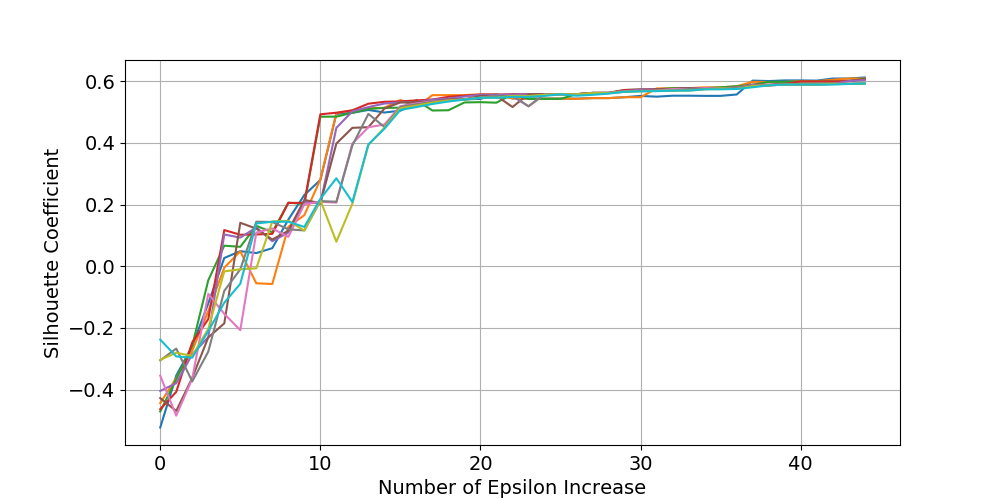

In [109]:
# plot the results
plt.figure()
plt.plot(my_range, one, two)
plt.plot(my_range, three, four)
plt.plot(my_range, five, six)
plt.plot(my_range, seven, eight)
plt.plot(my_range, nine, ten)
plt.xlabel('Number of Epsilon Increase')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data. If your data is labeled already, with a class that you are attempting to predict, be sure to not use it in fitting/training/predicting. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D and 3D plots. 

For bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot
- Plots of the clustered data

<IPython.core.display.Javascript object>


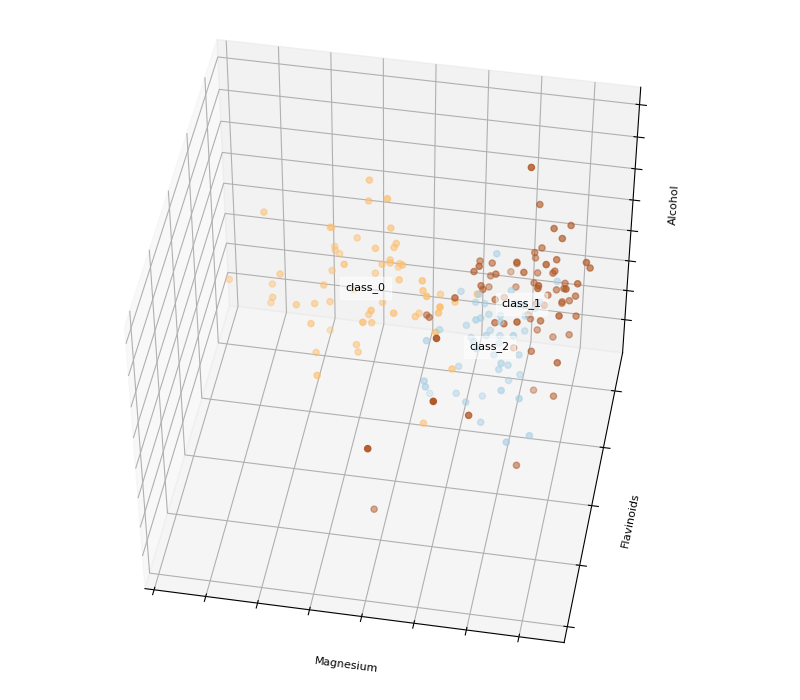

In [142]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import pandas as pd
import seaborn
plt.rcParams['font.size'] = 8
plt.rcParams['figure.figsize'] = (8.0, 7.0)

centers = [[1, 1], [-1, -1], [1, -1]]
wine = datasets.load_wine()
X = wine.data
y = wine.target

fig = plt.figure(0)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=100)

plt.cla()

pca = decomposition.PCA(n_components=3)
pca.fit_transform
pca.fit(X)
X = pca.transform(X)

for name, label in [('class_0', 0), ('class_1', 1), ('class_2', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap="Paired")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Magnesium')
ax.set_ylabel('Flavinoids')
ax.set_zlabel('Alcohol')

plt.show()

<IPython.core.display.Javascript object>


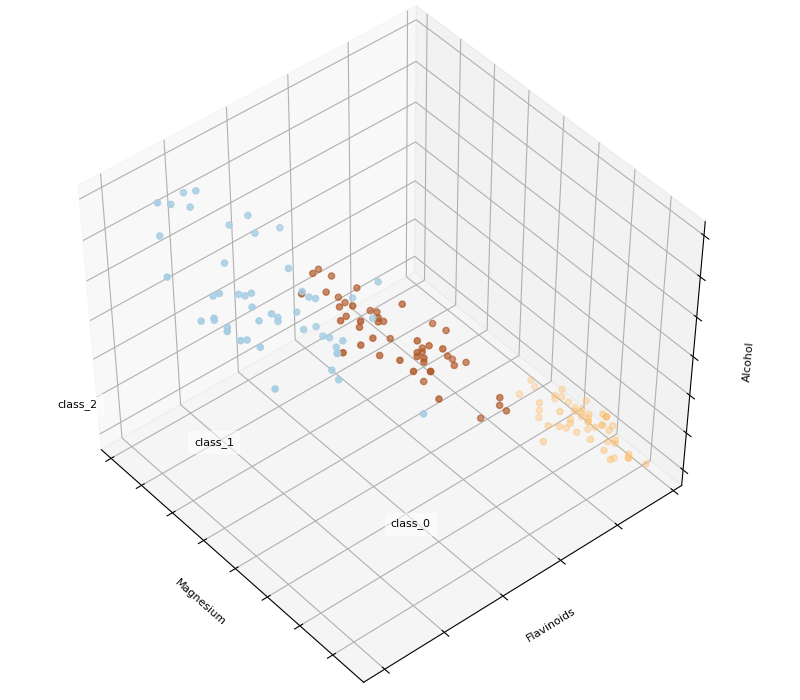

In [143]:
centers = [[1, 1], [-1, -1], [1, -1]]
wine = datasets.load_iris()
X = wine.data
y = wine.target

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

for name, label in [('class_0', 0), ('class_1', 1), ('class_2', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 3].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 3], X[:, 2], c=y, cmap="Paired")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Magnesium')
ax.set_ylabel('Flavinoids')
ax.set_zlabel('Alcohol')

plt.show()

<IPython.core.display.Javascript object>


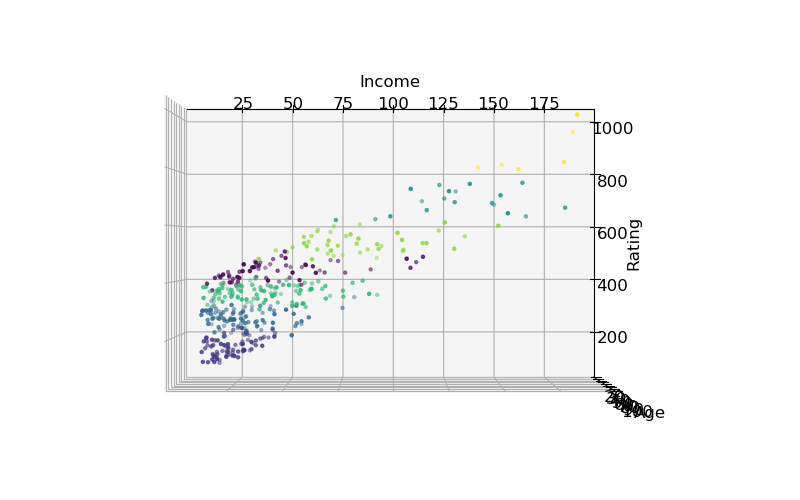

In [171]:
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8.0, 5.0)

X = pd.read_csv('../data/Credit.csv')
X = X.drop(["Unnamed: 0", "Gender", "Student", "Married", "Ethnicity"], axis = 1)
X.head()

#K-means with N clusters
N = 7
from sklearn.cluster import KMeans
km = KMeans(n_clusters=N, random_state=1)
km.fit(X)

# review the cluster labels
set(km.labels_)

X['cluster'] = km.predict(X)
X.cluster.value_counts()

fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=90, azim=270)

plt.cla()

ax.scatter(X['Income'], X['Rating'], X['Age'], c=X.cluster, s=5)

ax.set_xlabel('Income')
ax.set_ylabel('Rating')
ax.set_zlabel('Age')
plt.show()

# Scores are grouped in bands and by the increment of 100 until it reaches 600.

<IPython.core.display.Javascript object>


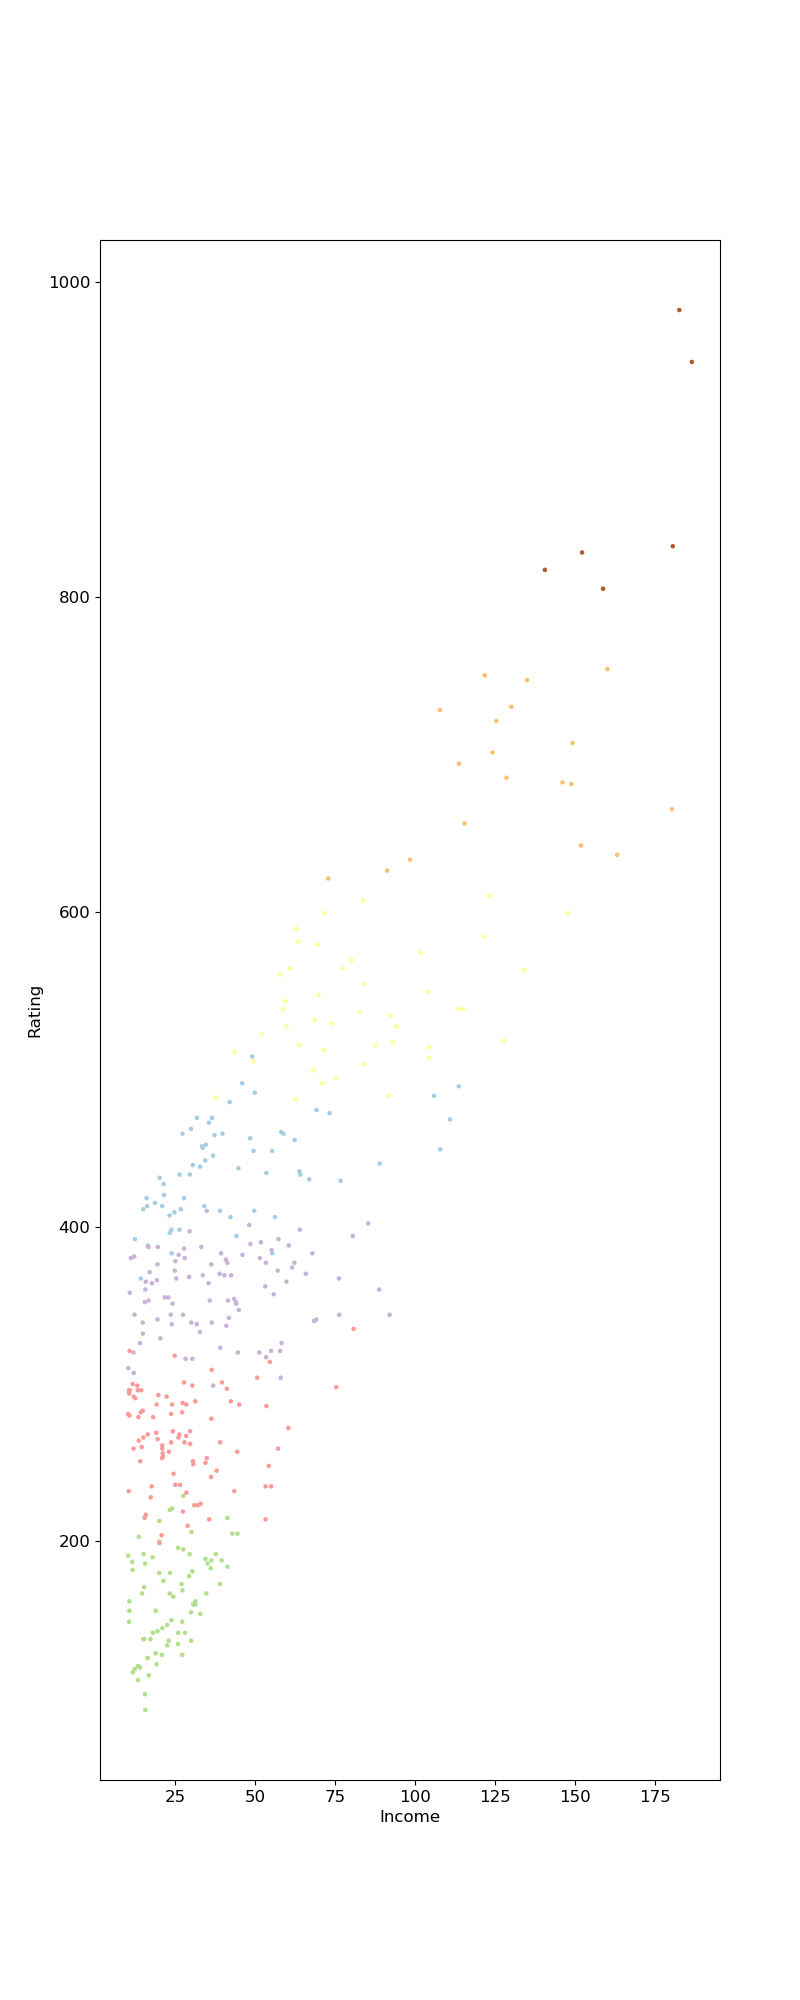

In [148]:
plt.rcParams['figure.figsize'] = (8.0, 20.0)

fig = plt.figure()
plt.scatter(X.Income, X.Rating, c=X.cluster, s=5, cmap='Paired')

plt.xlabel('Income')
plt.ylabel('Rating')
plt.show()

# Expanded 2D view

<IPython.core.display.Javascript object>


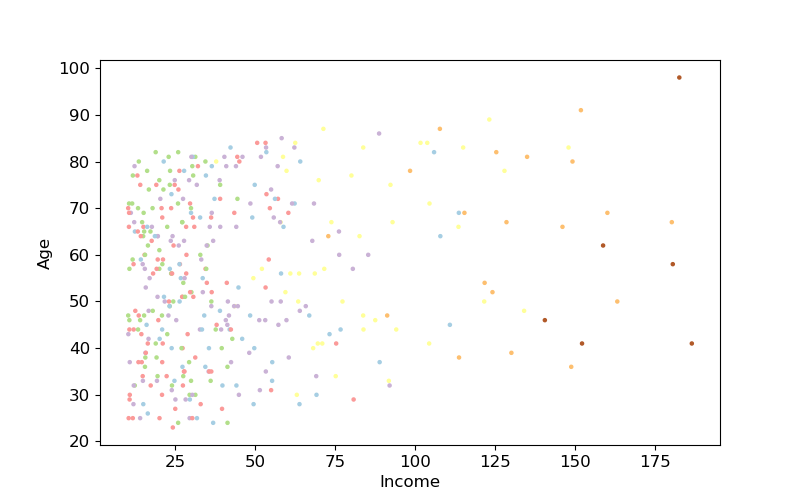

In [172]:
plt.rcParams['figure.figsize'] = (8.0, 5.0)

fig = plt.figure()
plt.scatter(X.Income, X.Age, c=X.cluster, s=5, cmap='Paired')

plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

# Age and Income, not so much related among the credit data population

<IPython.core.display.Javascript object>


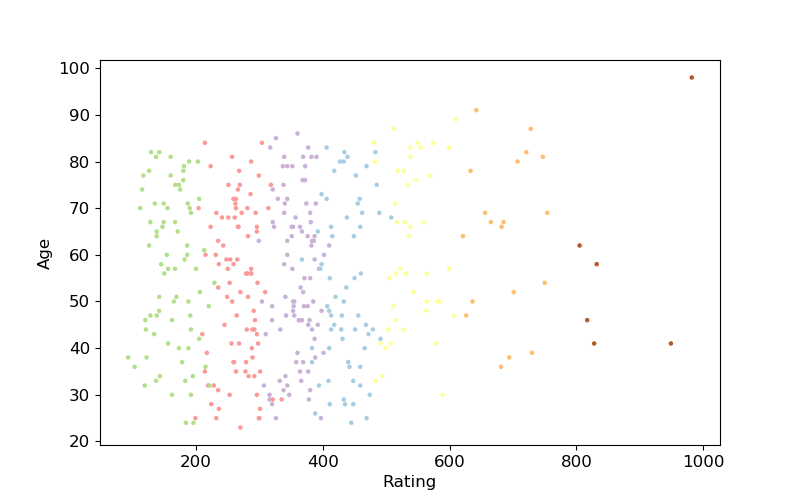

In [150]:
fig = plt.figure()
plt.scatter(X.Rating, X.Age, c=X.cluster, s=5, cmap='Paired')

plt.xlabel('Rating')
plt.ylabel('Age')
plt.show()

# The same goes for Rating and Income
# What's more interesting in this plot is that there are hollow areas between the color bands

<IPython.core.display.Javascript object>


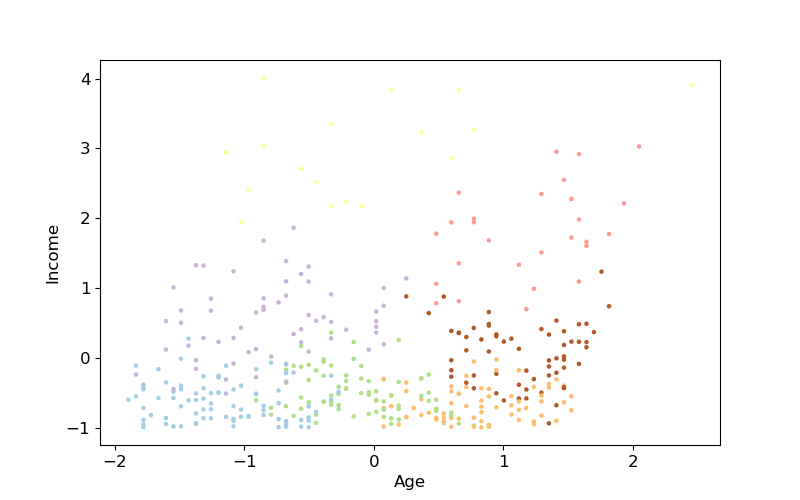

In [173]:
XX = X.copy()
XX['Income'] = (X.Income - X.Income.mean())/X.Income.std()
XX['Rating'] = (X.Rating - X.Rating.mean())/X.Rating.std()
XX['Age'] = (X.Age - X.Age.mean())/X.Age.std()

km = KMeans(n_clusters=N, random_state=1)
XX['cluster'] = km.fit_predict(XX[['Age', 'Rating', 'Income']])

fig = plt.figure()
plt.scatter(XX.Age, XX.Income, c=XX.cluster, s=5, cmap='Paired')

plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

<IPython.core.display.Javascript object>


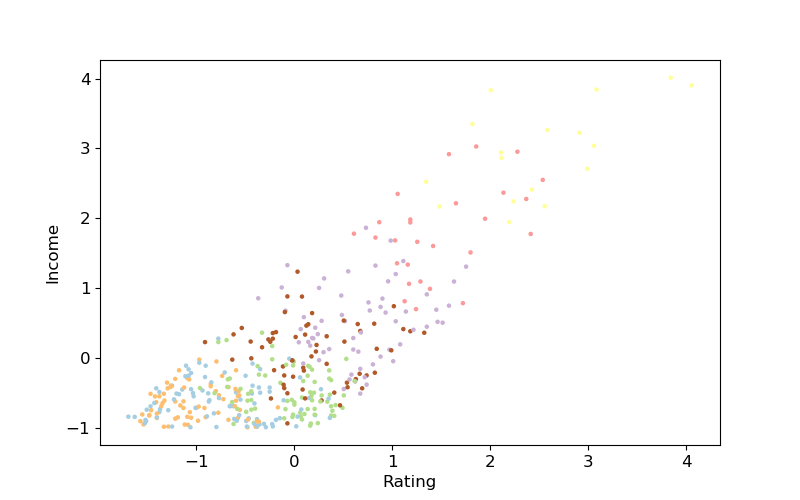

In [174]:
XX = X.copy()
XX['Income'] = (X.Income - X.Income.mean())/X.Income.std()
XX['Rating'] = (X.Rating - X.Rating.mean())/X.Rating.std()
XX['Age'] = (X.Age - X.Age.mean())/X.Age.std()

km = KMeans(n_clusters=N, random_state=1)
XX['cluster'] = km.fit_predict(XX[['Age', 'Rating', 'Income']])

fig = plt.figure()
plt.scatter(XX.Rating, XX.Income, c=XX.cluster, s=5, cmap='Paired')

plt.xlabel('Rating')
plt.ylabel('Income')
plt.show()

<IPython.core.display.Javascript object>


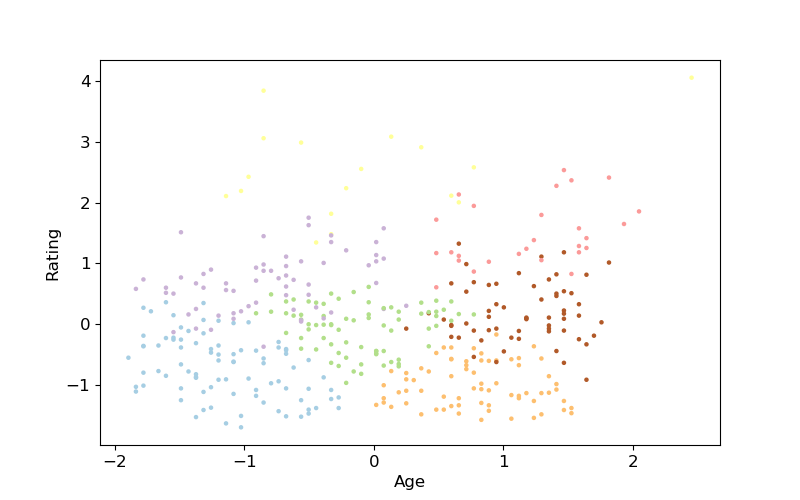

In [175]:
XX = X.copy()
XX['Income'] = (X.Income - X.Income.mean())/X.Income.std()
XX['Rating'] = (X.Rating - X.Rating.mean())/X.Rating.std()
XX['Age'] = (X.Age - X.Age.mean())/X.Age.std()

km = KMeans(n_clusters=N, random_state=1)
XX['cluster'] = km.fit_predict(XX[['Age', 'Rating', 'Income']])

fig = plt.figure()
plt.scatter(XX.Age, XX.Rating, c=XX.cluster, s=5, cmap='Paired')

plt.xlabel('Age')
plt.ylabel('Rating')
plt.show()

<IPython.core.display.Javascript object>


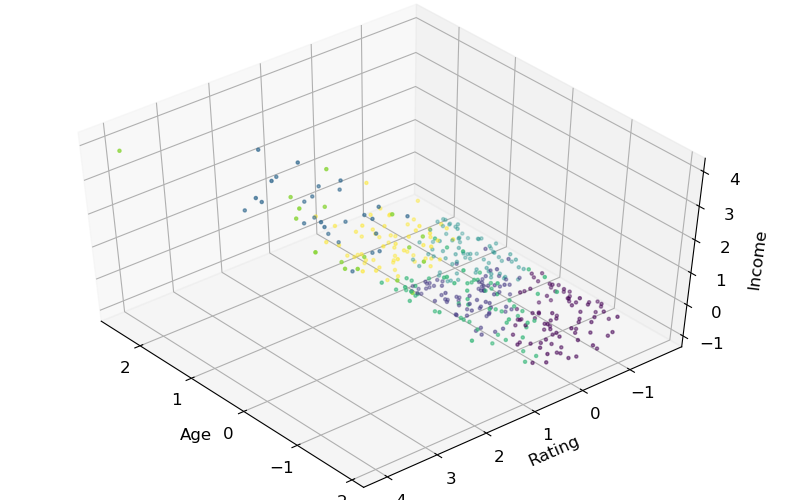

In [176]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(XX['Age'], XX['Rating'], XX['Income'], c=XX.cluster, s=5)

ax.set_xlabel('Age')
ax.set_ylabel('Rating')
ax.set_zlabel('Income')
plt.show()

<IPython.core.display.Javascript object>


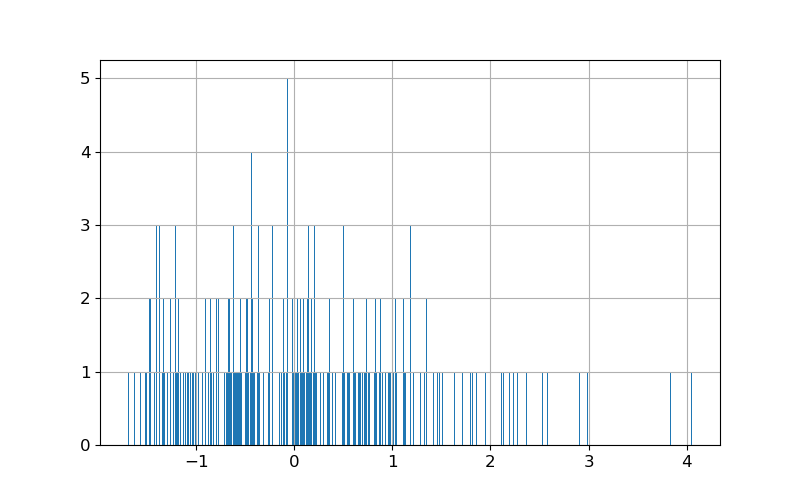

In [155]:
fig = plt.figure()
XX.Rating.hist(bins=1000)

<IPython.core.display.Javascript object>


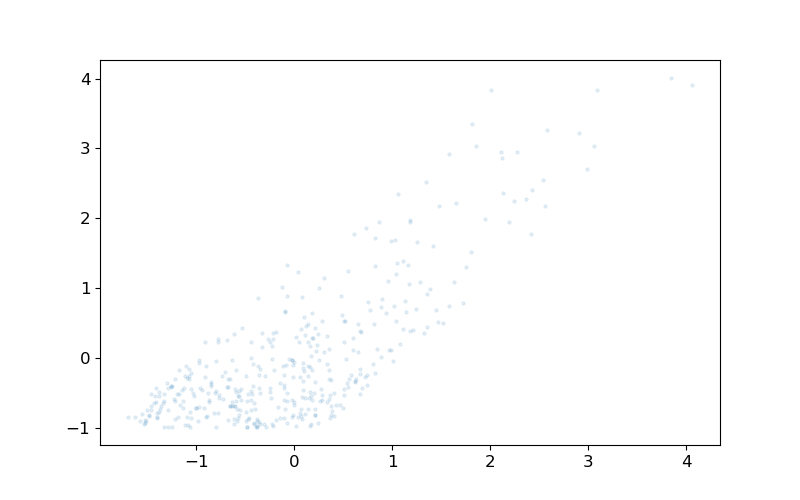

In [156]:
fig = plt.figure()
plt.scatter(XX.Rating, XX.Income, alpha=.1, s=5, )

In [168]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.12)
XX.cluster = dbscan.fit_predict(XX[['Income','Rating', 'Age']])
XX.cluster.value_counts()

-1    400
Name: cluster, dtype: int64

<IPython.core.display.Javascript object>


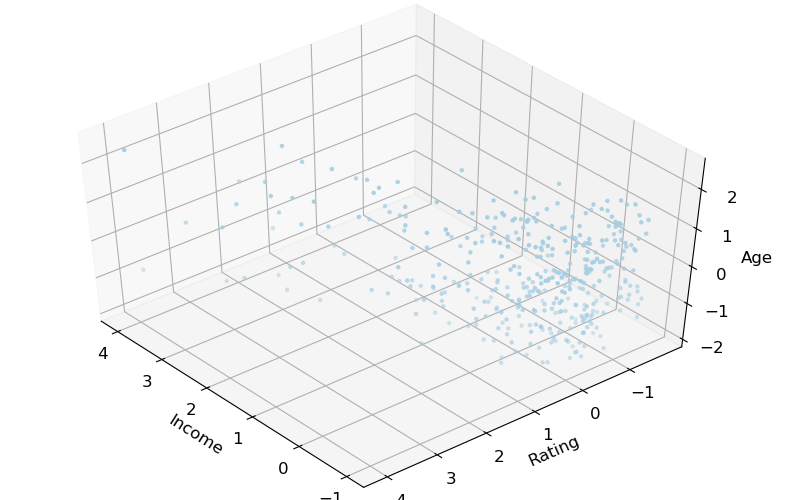

In [158]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(XX['Income'], XX['Rating'], XX['Age'], c=XX.cluster, s=5, cmap='Paired')

ax.set_xlabel('Income')
ax.set_ylabel('Rating')
ax.set_zlabel('Age')
plt.show()

<IPython.core.display.Javascript object>


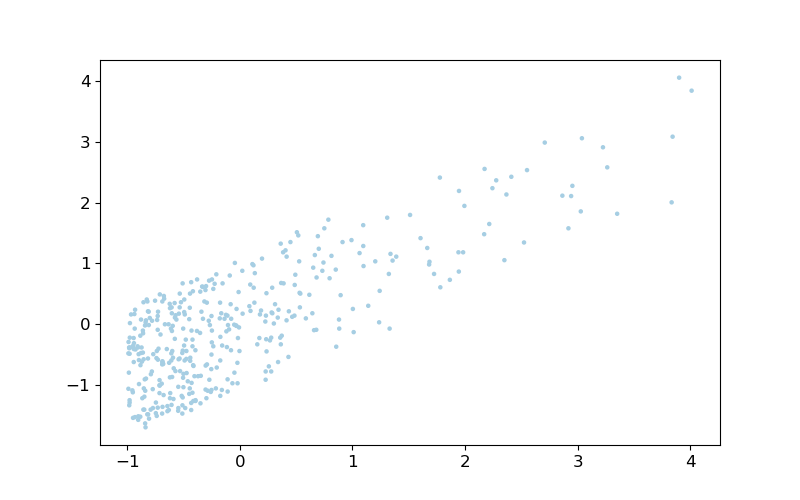

In [159]:
fig = plt.figure()
plt.scatter(XX.Income, XX.Rating, s=5, c=XX.cluster, cmap='Paired')

<IPython.core.display.Javascript object>


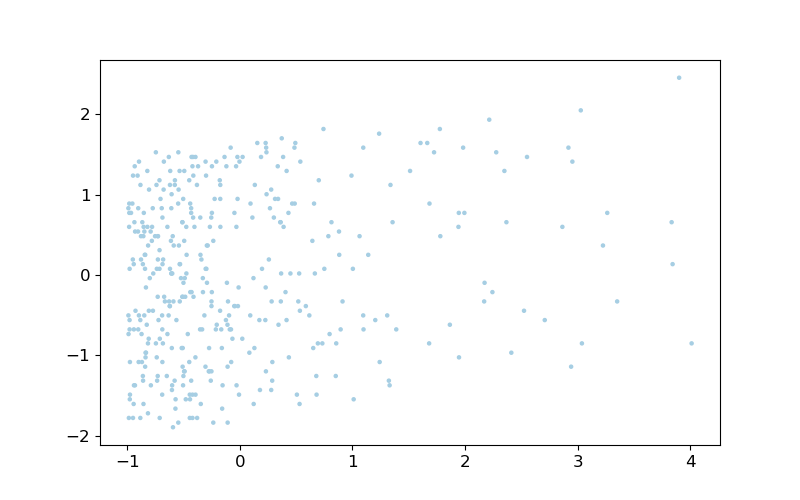

In [160]:
fig = plt.figure()
plt.scatter(XX.Income, XX.Age, s=5, c=XX.cluster, cmap='Paired')

In [177]:
# calculate SC for K=7
from sklearn import metrics
metrics.silhouette_score(XX[['Income', 'Rating', 'Age']], X.cluster)

0.0736170561074945

In [178]:
metrics.silhouette_score(XX[['Income', 'Rating', 'Age']], XX.cluster)

0.3183053475041708

In [179]:
from tqdm import tqdm

# calculate SC for K=2 through K=19
k_range = range(2, 40)
scores = []
for k in tqdm(k_range):
    km = KMeans(n_clusters=k, random_state=1)
    labels = km.fit_predict(XX[['Income', 'Rating', 'Age']])
    scores.append(metrics.silhouette_score(XX[['Income', 'Rating', 'Age']], labels))









  0%|          | 0/38 [00:00<?, ?it/s]







  8%|▊         | 3/38 [00:00<00:01, 28.77it/s]







 13%|█▎        | 5/38 [00:00<00:01, 23.87it/s]







 18%|█▊        | 7/38 [00:00<00:01, 20.89it/s]







 24%|██▎       | 9/38 [00:00<00:01, 19.02it/s]







 29%|██▉       | 11/38 [00:00<00:01, 16.90it/s]







 34%|███▍      | 13/38 [00:00<00:01, 14.91it/s]







 39%|███▉      | 15/38 [00:00<00:01, 14.17it/s]







 45%|████▍     | 17/38 [00:01<00:01, 12.22it/s]







 50%|█████     | 19/38 [00:01<00:01, 11.08it/s]







 55%|█████▌    | 21/38 [00:01<00:01, 10.25it/s]







 61%|██████    | 23/38 [00:01<00:01,  9.77it/s]







 63%|██████▎   | 24/38 [00:01<00:01,  9.32it/s]







 66%|██████▌   | 25/38 [00:02<00:01,  8.92it/s]







 68%|██████▊   | 26/38 [00:02<00:01,  8.41it/s]







 71%|███████   | 27/38 [00:02<00:01,  7.72it/s]







 74%|███████▎  | 28/38 [00:02<00:01,  7.15it/s]







 76%|███████▋  | 29/38 [00:02<00:01,  6.70it/s]







 79%|███████▉  

<IPython.core.display.Javascript object>


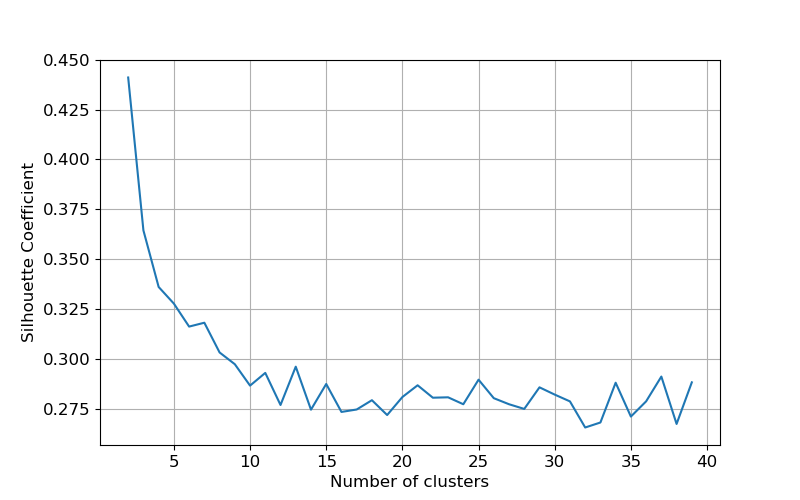

In [180]:
# plot the results
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

## Note
You may use any for both parts 1 and 2, I only recommend using the data I used in the Lesson for part 1. I've included several new datasets in the `data/` folder, such as `beers.csv`, `snow_tweets.csv`, `data/USCensus1990.data.txt.gz`. You do not need to unzip or ungzip any data files. Pandas can open these files on its own.